O caixeiro viajante
===================



## Introdução



Até agora, sempre que nós aplicamos os operadores de `cruzamento` ou de `mutação` nós não nos preocupamos se o indivíduo gerado por estes processos era um `indivíduo válido`. Um indivíduo válido é aquele que representa uma solução possível e bem formulada para o problema em questão.

Por exemplo, no problema das caixas binárias, `[1, 0, 0, 1]` é um indivíduo válido para o caso de termos 4 caixas. Um exemplo de `indivíduo inválido` para este mesmo problema seria `[1, 0, 0, "a"]`, pois um dos genes está assumindo um valor fora do domínio. Outro exemplo de indivíduo inválido poderia ser `[1, 1, 0]`, pois é um indivíduo com apenas 3 genes, sendo que o esperado eram 4 genes.



## Objetivo



Utilizar um algoritmo genético para encontrar uma solução para o problema do caixeiro viajante. Considere que o caixeiro irá visitar 5 cidades.



## Descrição do problema



O problema consiste em descobrir a rota de menor distância entre $n$ pontos no plano cartesiano (ou seja, $n$ pontos com coordenadas $(x,y)$). A rota pode se iniciar em qualquer um dos pontos disponíveis e deve terminar no ponto inicial, visitando todos os demais pontos apenas uma vez. Considere que a rota entre um ponto e outro é a linha reta que liga os dois pontos.



# Visualização

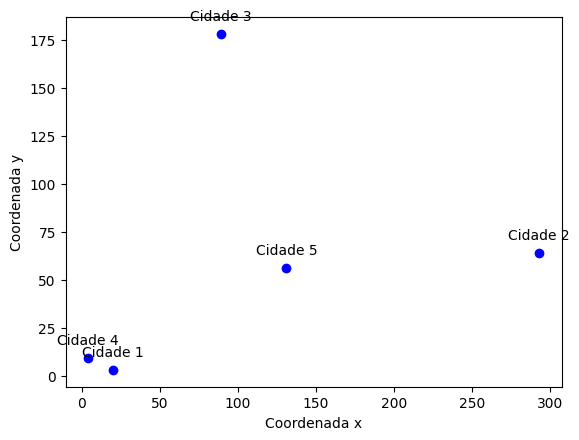

In [1]:
from funcoes_5 import plota_cidades

CIDADES = {
    "Cidade 1": (20, 3),
    "Cidade 2": (293, 64),
    "Cidade 3": (89, 178),
    "Cidade 4": (4, 9),
    "Cidade 5": (131, 56),
}

plota_cidades(CIDADES)

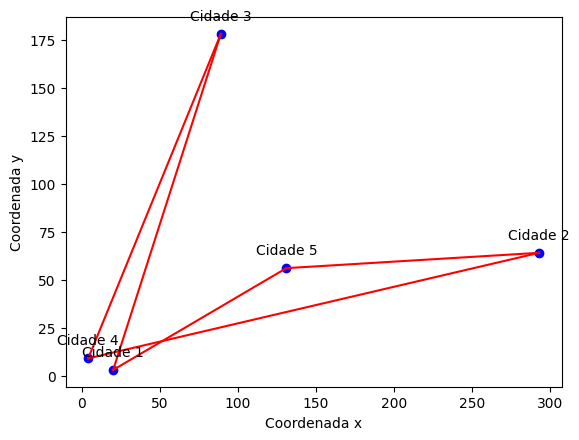

In [2]:
from funcoes_5 import plota_trajeto

candidato = ["Cidade 5", "Cidade 1", "Cidade 3", "Cidade 4", "Cidade 2"]

plota_trajeto(CIDADES, candidato)

## Resolução



In [3]:
from pprint import pprint
from functools import partial
from itertools import permutations

from funcoes_5 import cria_cidades
from funcoes_5 import populacao_caixeiro as cria_populacao
from funcoes_5 import funcao_objetivo_pop_caixeiro
from funcoes_5 import funcao_objetivo_caixeiro
from funcoes_5 import selecao_torneio_min as funcao_selecao
from funcoes_5 import cruzamento_ordenado as funcao_cruzamento
from funcoes_5 import mutacao_troca as funcao_mutacao

In [4]:
NUM_CIDADES = 5
CIDADES = cria_cidades(NUM_CIDADES)

TAMANHO_POPULACAO = 100
NUM_GERACOES = 500
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
TAMANHO_TORNEIO = 3

In [5]:
populacao = cria_populacao(TAMANHO_POPULACAO, CIDADES)
# pprint(populacao)
# funcao_objetivo(populacao, CIDADES)

In [6]:
funcao_objetivo = partial(funcao_objetivo_pop_caixeiro, cidades=CIDADES)

In [7]:
hall_da_fama = []

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo(populacao)        
    selecionados = funcao_selecao(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = funcao_cruzamento(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)
    
    # Mutação
    funcao_mutacao(proxima_geracao, CHANCE_DE_MUTACAO)
    
    # Atualização do hall da fama
    fitness = funcao_objetivo(proxima_geracao)
        
    menor_fitness = min(fitness)
    indice = fitness.index(menor_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao


Melhor individuo obtido por algoritmos genéticos:
['Cidade 3', 'Cidade 2', 'Cidade 1', 'Cidade 4', 'Cidade 0'] com distância: 833.7431882291382



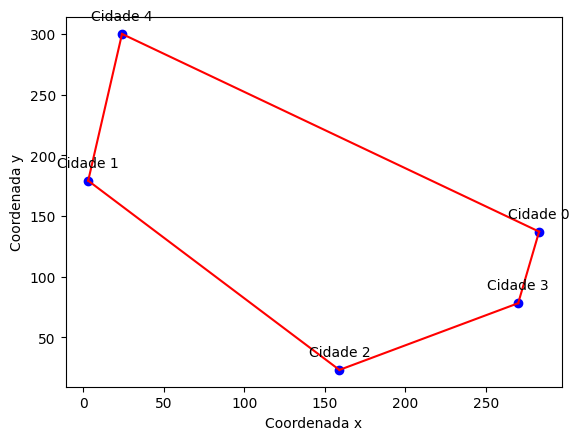

In [8]:
fitness = funcao_objetivo(hall_da_fama)
menor_fitness = min(fitness)
indice = fitness.index(menor_fitness)
melhor_individuo_observado = hall_da_fama[indice]
distancia = funcao_objetivo_caixeiro(melhor_individuo_observado, CIDADES)

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_observado, "com distância:", distancia)
print()

plota_trajeto(CIDADES, melhor_individuo_observado)


Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 3', 'Cidade 2', 'Cidade 1', 'Cidade 4') com distância: 833.7431882291382



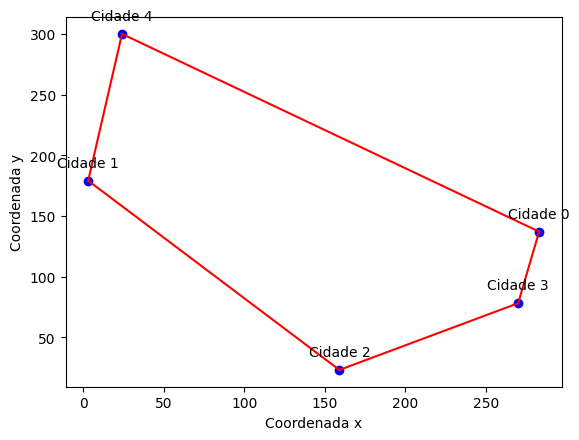

In [9]:
if NUM_CIDADES < 8:
    fitness_otimo = float("inf")

    # testando todas as permutações possíveis
    for caminho in permutations(list(CIDADES.keys())):
        distancia = funcao_objetivo_caixeiro(caminho, CIDADES)
        if distancia < fitness_otimo:
            fitness_otimo = distancia
            resposta_otima = caminho
            melhor_distancia = distancia

    print()
    print("Melhor individuo obtido por busca exaustiva:")
    print(resposta_otima, "com distância:", melhor_distancia)
    print()

    plota_trajeto(CIDADES, resposta_otima)